# Counting Atomic Bomb Survivors

https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00450161&tstat=000001089035&cycle=8&tclass1=000001097755

https://www.mhlw.go.jp/toukei/list/88-1b.html#kekka


REPORT:

https://www.mhlw.go.jp/toukei/list/dl/88-1b-02.pdf


https://www.pri.org/stories/2017-11-17/how-other-countries-can-help-us-understand-americas-mass-shooting-crisis


http://www.storybench.org/how-pris-the-world-conveyed-the-death-toll-of-mass-shootings-using-sound/

In [5]:
import pandas as pd
import re
import numpy as np

import math
import statistics

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [16]:
hibakusha = pd.read_csv('data/hibakusha_data_cleaned.csv')
hibakusha.tail(5)

,year,hibakusha_total
57,2014,183519
58,2015,174080
59,2016,164621
60,2017,154859
61,2018,145844


## CANCER DATA

Sex

* 1 : Male
* 2 : Female

Ground distance cat:

* 1 : <3000 m
* 2 : 3000-<15000
* 3 : NIC

etc

In [11]:
cancer_col = {
    'agxcat':'age_at_exposure',
    'agecat':'attained_age',
    'distcat':'ground_distance_categories',
    'nhl':'Non Hodgkin lymphoma',
    'hi':'Hodgkin lymphoma',
    'mye':'Myeloma',
    'all':'Acute lymphoblastic leukemia',
    'oll':'Aleukemia/subleukemic lymphoid leukemia',
    'alltot':'total ALL',
    'cll':'Chronic lymphocytic leukemia',
    'hcl':'Hairy cell leukemia',
    'clltot':'Total CLL',
    'atl':'Adult T-cell leukemia',
    'aml':'Acute myeloid leukemia',
    'oml':'a-/sub-leukemic myeloid leukemia, or myeloid leukemia NOS',
    'amol':'Acute monocytic leukemia',
    'amltot':'total_AML',
    'cml':'Chronic myeloid leukemia',
    'othleuk':'Other leukemia',
    'noncll':'Non-CLL/non-ATL leumemia',
    'leuktot':'total_leukemia',
    'hldtot':'all_events'
}
cancer = pd.read_csv('data/cancer/lsshempy.csv')

In [13]:
cancer = cancer.rename(columns=cancer_col)
cancer.head(3)

,city,sex,un4gy,ground_distance_categories,age_at_exposure,attained_age,dcat,time,upyr,pyr,subjects,gdist,agex,age,year,Non Hodgkin lymphoma,hl,Myeloma,Acute lymphoblastic leukemia,Aleukemia/subleukemic lymphoid leukemia,total ALL,Chronic lymphocytic leukemia,Hairy cell leukemia,Total CLL,Adult T-cell leukemia,Acute myeloid leukemia,"a-/sub-leukemic myeloid leukemia, or myeloid leukemia NOS",Acute monocytic leukemia,total_AML,Chronic myeloid leukemia,Other leukemia,Non-CLL/non-ATL leumemia,total_leukemia,all_events,mar_ad10,mar_ag,mar_an
0,1,1,0,1,1,2,23,1,9.01300,8.86005,4,753.7500,1.28750,7.56947,1951.877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4073.000,2850.000,122.3000
1,1,1,0,1,1,2,23,2,4.14921,4.07880,0,733.5444,0.94406,9.08584,1953.736,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,4089.514,2837.892,125.1623
2,1,1,0,1,1,3,23,1,2.25325,2.21501,1,901.0000,4.99000,11.27584,1951.877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3569.000,2900.000,66.9000


In [60]:
cancer.age_at_exposure.shape

(38578,)

In [59]:
cancer.age_at_exposure.sort_index().value_counts(dropna=False)

3     3683
1     3646
2     3568
4     3559
6     3346
5     3190
7     3155
8     2974
9     2723
10    2421
11    1955
12    1579
13    1194
14     914
15     671
Name: age_at_exposure, dtype: int64

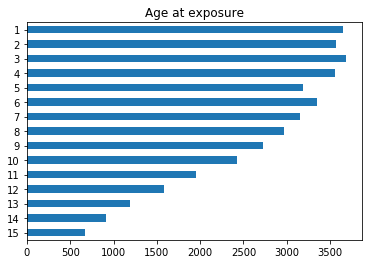

In [27]:
ax = cancer.age_at_exposure.value_counts().sort_index(ascending=False).\
    plot(kind='barh', title='Age at exposure')

# for idx, value in enumerate(df['grad_yr_bin'].value_counts(sort=False, ascending=False)):
#     ax.text(10, idx, value, color='black')
    
plt.savefig("charts/age-at-exposure.pdf",  bbox_inches='tight')

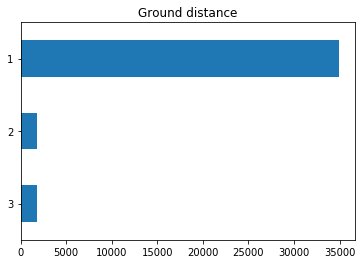

In [28]:
ax = cancer.ground_distance_categories.value_counts().sort_index(ascending=False).\
    plot(kind='barh', title='Ground distance')

plt.savefig("charts/ground-distance.pdf",  bbox_inches='tight')

In [37]:
cancer.total_leukemia.value_counts(dropna=False)

0    38185
1      384
2        9
Name: total_leukemia, dtype: int64

In [38]:
cancer.shape

(38578, 37)

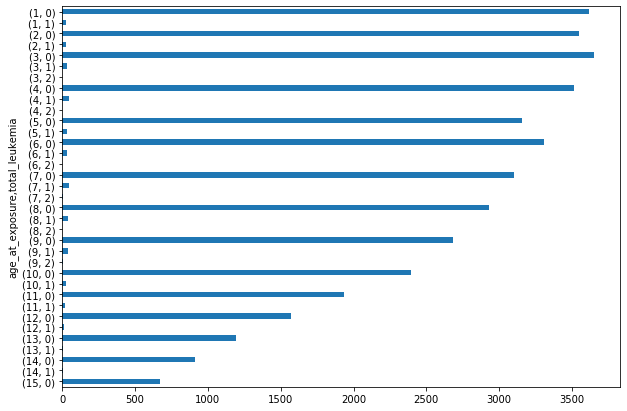

In [45]:
cancer.groupby('age_at_exposure').total_leukemia.\
        value_counts().sort_index(ascending=False).\
plot(kind='barh', figsize=(10,7))

In [53]:
cancer.all_events.value_counts()

0    37669
1      823
2       72
3       11
4        3
Name: all_events, dtype: int64

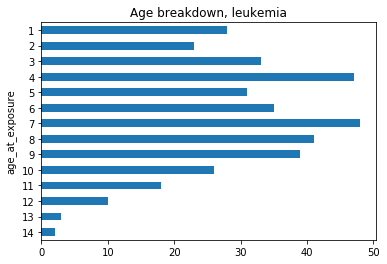

In [54]:
cancer[cancer.total_leukemia == 1].groupby('age_at_exposure').size().\
    sort_index(ascending=False).\
    plot(kind='barh', title='Age breakdown, leukemia')


plt.savefig("charts/leuk-by-age.pdf",  bbox_inches='tight')

In [18]:
hibakusha_type = pd.read_csv('data/hibakusha_2019_cleaned.csv')
hibakusha_recent

,hibakusha_type,total
0,1_direct_hit,90923
1,2_entered,31733
2,3_rescue,16209
3,4_foetus,6979
